redo charts in Bokeh next

In [1]:
import fred
fred.key('dfb19972959a1d59381d60985d854b94')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import leather
from IPython.display import SVG, display

In [3]:
srt = pd.DataFrame(fred.observations('SAHMREALTIME')['observations'])[['date', 'value']]
srt = srt.set_index('date')
srt['value'] = pd.to_numeric(srt['value'], errors = 'coerce')
sahm = srt[::-1].iloc[0,0]
print("The current value of the Sahm Rule Recession Indicator is:", sahm)

The current value of the Sahm Rule Recession Indicator is: 0.0


In [4]:
#estimate odds of recession; https://www.hamiltonproject.org/blog/how_will_we_know_when_a_recession_is_coming (table 1)
#note, I use 39% as odds of recession at 24 months for value between .1-.19
rec = srt
rec['odds_now'] = np.where(rec['value'] < 0, .01, 
                          np.where((rec['value'] >= 0.00) & (rec['value'] < 0.10), .02, 
                                  np.where((rec['value'] >= 0.10) & (rec['value'] < 0.20), .02,
                                          np.where((rec['value'] >= 0.20) & (rec['value'] < 0.30), .11,
                                                   np.where((rec['value'] >= 0.30) & (rec['value'] < 0.40), .40,
                                                            np.where((rec['value'] >= 0.40) & (rec['value'] < 0.50), .76,
                                                                     np.where((rec['value'] >= 0.50), .97, 1)))))))

rec['odds_3months'] = np.where(rec['value'] < 0, .02, 
                          np.where((rec['value'] >= 0.00) & (rec['value'] < 0.10), .05, 
                                  np.where((rec['value'] >= 0.10) & (rec['value'] < 0.20), .13,
                                          np.where((rec['value'] >= 0.20) & (rec['value'] < 0.30), .33,
                                                   np.where((rec['value'] >= 0.30) & (rec['value'] < 0.40), .40,
                                                            np.where((rec['value'] >= 0.40) & (rec['value'] < 0.50), .76,
                                                                     np.where((rec['value'] >= 0.50), .97, 1)))))))

rec['odds_6months'] = np.where(rec['value'] < 0, .05, 
                          np.where((rec['value'] >= 0.00) & (rec['value'] < 0.10), .08, 
                                  np.where((rec['value'] >= 0.10) & (rec['value'] < 0.20), .23,
                                          np.where((rec['value'] >= 0.20) & (rec['value'] < 0.30), .33,
                                                   np.where((rec['value'] >= 0.30) & (rec['value'] < 0.40), .40,
                                                            np.where((rec['value'] >= 0.40) & (rec['value'] < 0.50), .76,
                                                                     np.where((rec['value'] >= 0.50), .97, 1)))))))

rec['odds_12months'] = np.where(rec['value'] < 0, .10, 
                          np.where((rec['value'] >= 0.00) & (rec['value'] < 0.10), .20, 
                                  np.where((rec['value'] >= 0.10) & (rec['value'] < 0.20), .33,
                                          np.where((rec['value'] >= 0.20) & (rec['value'] < 0.30), .39,
                                                   np.where((rec['value'] >= 0.30) & (rec['value'] < 0.40), .40,
                                                            np.where((rec['value'] >= 0.40) & (rec['value'] < 0.50), .76,
                                                                     np.where((rec['value'] >= 0.50), .97, 1)))))))

rec['odds_24months'] = np.where(rec['value'] < 0, .25, 
                          np.where((rec['value'] >= 0.00) & (rec['value'] < 0.10), .39, 
                                  np.where((rec['value'] >= 0.10) & (rec['value'] < 0.20), .39,
                                          np.where((rec['value'] >= 0.20) & (rec['value'] < 0.30), .39,
                                                   np.where((rec['value'] >= 0.30) & (rec['value'] < 0.40), .40,
                                                            np.where((rec['value'] >= 0.40) & (rec['value'] < 0.50), .76,
                                                                     np.where((rec['value'] >= 0.50), .97, 1)))))))



rec.tail(1)

,value,odds_now,odds_3months,odds_6months,odds_12months,odds_24months
date,,,,,,
2020-01-01,0.0,0.02,0.05,0.08,0.2,0.39


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.


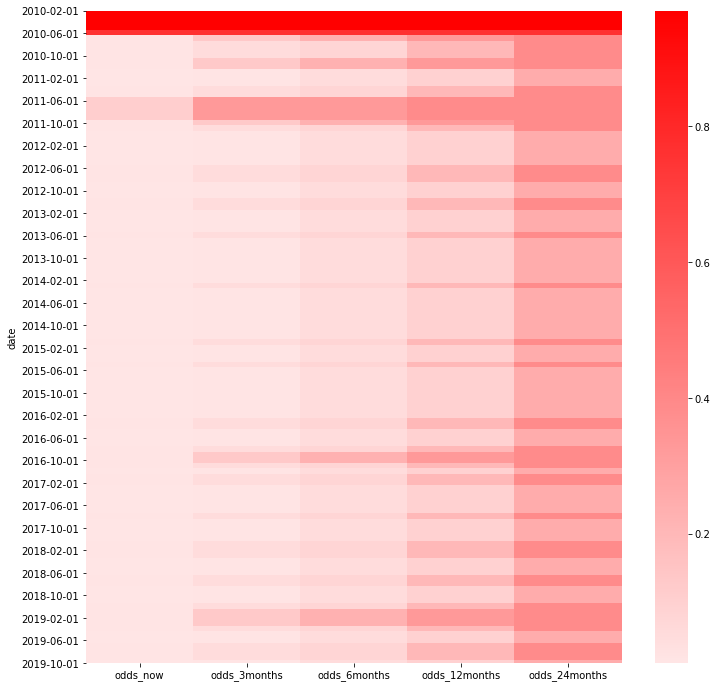

In [5]:
hm = srt[['odds_now', 'odds_3months', 'odds_6months', 'odds_12months', 'odds_24months']].tail(120)
plt.figure(figsize=(12,12))
sns.heatmap(hm, yticklabels=4, cmap = sns.light_palette('red',1000))

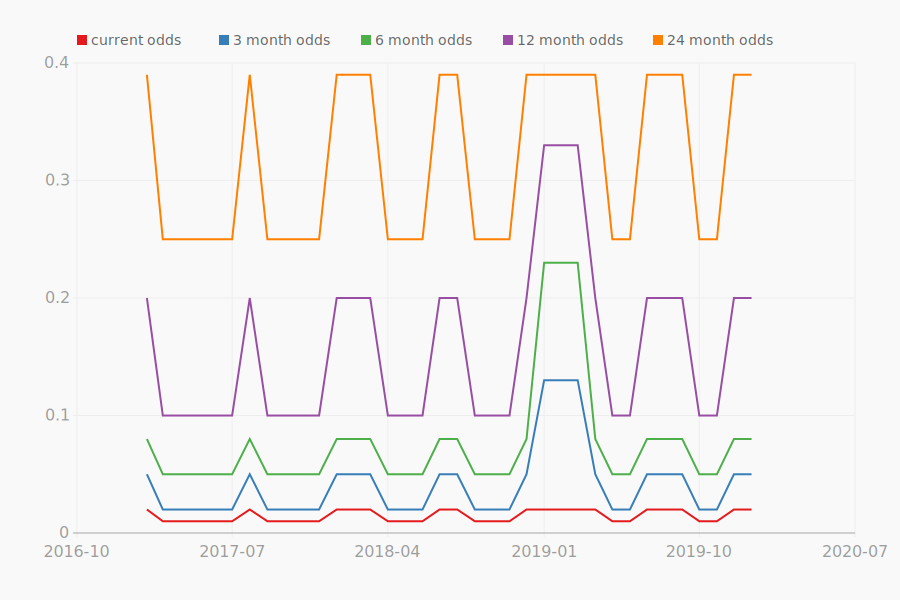

In [10]:
lc = srt[['odds_now', 'odds_3months', 'odds_6months', 'odds_12months', 'odds_24months']].tail(36)
lc.reset_index(inplace=True)
lc['date'] = pd.to_datetime(lc['date'])
chart = leather.Chart()
chart.add_line(lc[['date', 'odds_now']].values.tolist(), name = 'current odds')
chart.add_line(lc[['date', 'odds_3months']].values.tolist(), name = '3 month odds')
chart.add_line(lc[['date', 'odds_6months']].values.tolist(), name = '6 month odds')
chart.add_line(lc[['date', 'odds_12months']].values.tolist(), name = '12 month odds')
chart.add_line(lc[['date', 'odds_24months']].values.tolist(), name = '24 month odds')
chart.to_svg('sahm_lines.svg', height = 600, width = 900)
display(SVG('sahm_lines.svg'))

In [ ]:
#add plotly interactive chart of recession odds in next 3 months